In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of huggingface-hub to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 43.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset
cifar10_ds = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [3]:
!pip install contrastive

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 73.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 44.3 MB/s eta 0:00:00:00:0100:01
  Created wheel for contrastive: filename=contrastive-1.2.0-py3-none-any.whl size=6899 sha256=5693c51acdff647559eafdcfef6b4573f5e0699db4daffb56f462e4b8dfa0b8f
  Stored in directory: /root/.cache

In [4]:
print(cifar10_ds)

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


In [5]:
from sklearn.decomposition import PCA
import numpy as np

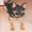

5

In [6]:
index = 10
cifar10_ds['train'][index]['img'].show()
cifar10_ds['train'][index]['img'].size
cifar10_ds['train'][index]['label']

In [7]:
np.asarray(cifar10_ds['train'][index]['img']).flatten().shape

(3072,)

In [8]:
import random

### Demo Quickstart

In [9]:
X_target = list()
X_label = list()
X_background = list()
TARGET_LABEL_LIST = [0,1]
for i in random.sample(range(10000),2000):
    label = cifar10_ds['train'][i]['label']
    img_flat = np.asarray(cifar10_ds['train'][i]['img']).flatten()
    if label in TARGET_LABEL_LIST:
        X_target.append(img_flat)
        X_label.append(label)
    else:
        X_background.append(img_flat)

X_target = np.asarray(X_target)
X_label = np.asarray(X_label)
X_background = np.asarray(X_background)

print(X_target.shape)
print(X_label.shape)
print(X_background.shape)

(397, 3072)
(397,)
(1603, 3072)


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_target)
print(X_pca.shape)

(397, 2)


In [11]:
from contrastive import CPCA

cpca = CPCA()
X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])

In [12]:
X_cpca = np.real(np.asarray(X_cpca))
print(X_cpca.shape)

(4, 397, 2)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_pca, X_label, cv=5)
print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.655 +/- 0.026


In [14]:
X_cpca[0].shape

(397, 2)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

for i in range(4):
    knn = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X_cpca[i], X_label, cv=5)
    print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")

Accuracy: 0.652 +/- 0.025
Accuracy: 0.554 +/- 0.081
Accuracy: 0.579 +/- 0.068
Accuracy: 0.549 +/- 0.029


In [16]:
results_list = list()

for i in range(10):
    for j in range(10):
        tmp_dict = {
            'no_preprocessing':None,
            'PCA':None,
            'cPCA-0':None,
            'cPCA-1':None,
            'cPCA-2':None,
            'cPCA-3':None,
            'name':f"{i} AND {j}"
        }
        X_target = list()
        X_label = list()
        X_background = list()
        if i>j:
            TARGET_LABEL_LIST = [i,j]
            for l in random.sample(range(10000),2000):
                label = cifar10_ds['train'][l]['label']
                img_flat = np.asarray(cifar10_ds['train'][l]['img']).flatten()
                if label in TARGET_LABEL_LIST:
                    X_target.append(img_flat)
                    X_label.append(label)
                else:
                    X_background.append(img_flat)
            X_target = np.asarray(X_target)
            X_label = np.asarray(X_label)
            X_background = np.asarray(X_background)
            print("sample complete")
            print(f"label: {TARGET_LABEL_LIST}")
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_target)
            print(X_pca.shape)
            print("PCA complete")
            cpca = CPCA()
            X_cpca = cpca.fit_transform(X_target[:,:], X_background[:,:])
            X_cpca = np.real(X_cpca)
            print("CPCA complete")
            print("No preprocessing score")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_target, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['no_preprocessing']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("PCA scores")
            knn = KNeighborsClassifier(n_neighbors=5)
            scores = cross_val_score(knn, X_pca, X_label, cv=5)
            print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
            tmp_dict['PCA']=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print("cPCA scores")
            for k in range(4):
                knn = KNeighborsClassifier(n_neighbors=5)
                scores = cross_val_score(knn, X_cpca[k], X_label, cv=5)
                print(f"Accuracy: {round(np.mean(scores),3)} +/- {round(np.std(scores),3)}")
                tmp_dict['cPCA-'+str(k)]=f"{round(np.mean(scores),3)} +/- {round(np.std(scores),3)}"
            print()
            results_list.append(tmp_dict)
            # raise KeyError

sample complete
label: [1, 0]
(377, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.631 +/- 0.028
PCA scores
Accuracy: 0.578 +/- 0.031
cPCA scores
Accuracy: 0.576 +/- 0.022
Accuracy: 0.631 +/- 0.028
Accuracy: 0.61 +/- 0.061
Accuracy: 0.549 +/- 0.041

sample complete
label: [2, 0]
(406, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.754 +/- 0.052
PCA scores
Accuracy: 0.626 +/- 0.033
cPCA scores
Accuracy: 0.631 +/- 0.05
Accuracy: 0.564 +/- 0.058
Accuracy: 0.502 +/- 0.028
Accuracy: 0.51 +/- 0.061

sample complete
label: [2, 1]
(399, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.629 +/- 0.022
PCA scores
Accuracy: 0.596 +/- 0.03
cPCA scores
Accuracy: 0.624 +/- 0.041
Accuracy: 0.644 +/- 0.044
Accuracy: 0.669 +/- 0.043
Accuracy: 0.566 +/- 0.088

sample complete
label: [3, 0]
(382, 2)
PCA complete
CPCA complete
No preprocessing score
Accuracy: 0.754 +/- 0.038
PCA scores
Accuracy: 0.652 +/- 0.053
cPCA scores
Accuracy: 0.641 +/- 0.049
Accurac

In [17]:
import pandas as pd
df = pd.DataFrame(results_list)
df

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3,name
0,0.631 +/- 0.028,0.578 +/- 0.031,0.576 +/- 0.022,0.631 +/- 0.028,0.61 +/- 0.061,0.549 +/- 0.041,1 AND 0
1,0.754 +/- 0.052,0.626 +/- 0.033,0.631 +/- 0.05,0.564 +/- 0.058,0.502 +/- 0.028,0.51 +/- 0.061,2 AND 0
2,0.629 +/- 0.022,0.596 +/- 0.03,0.624 +/- 0.041,0.644 +/- 0.044,0.669 +/- 0.043,0.566 +/- 0.088,2 AND 1
3,0.754 +/- 0.038,0.652 +/- 0.053,0.641 +/- 0.049,0.704 +/- 0.051,0.508 +/- 0.031,0.49 +/- 0.042,3 AND 0
4,0.728 +/- 0.069,0.591 +/- 0.065,0.625 +/- 0.043,0.562 +/- 0.053,0.63 +/- 0.06,0.526 +/- 0.036,3 AND 1
5,0.605 +/- 0.036,0.552 +/- 0.051,0.552 +/- 0.063,0.595 +/- 0.044,0.535 +/- 0.032,0.542 +/- 0.038,3 AND 2
6,0.773 +/- 0.056,0.693 +/- 0.052,0.641 +/- 0.049,0.612 +/- 0.04,0.47 +/- 0.032,0.499 +/- 0.063,4 AND 0
7,0.657 +/- 0.048,0.687 +/- 0.053,0.69 +/- 0.068,0.755 +/- 0.012,0.575 +/- 0.064,0.537 +/- 0.059,4 AND 1
8,0.583 +/- 0.034,0.543 +/- 0.023,0.541 +/- 0.064,0.543 +/- 0.024,0.483 +/- 0.028,0.543 +/- 0.052,4 AND 2
9,0.617 +/- 0.056,0.516 +/- 0.028,0.491 +/- 0.031,0.555 +/- 0.027,0.495 +/- 0.07,0.493 +/- 0.045,4 AND 3


In [18]:
def color_format(s):
    original_acc = get_acc(s['no_preprocessing'])
    # print(original_acc)
    is_max = s == s.max()
    color_list = []
    for i in s:
        # print(f'hi: {i}')
        if get_acc(i) <= original_acc:
            color_list.append('background-color: white')
        else:
            color_list.append('background-color: rgb(100,255,100)')
    return color_list

def get_acc(x):
    return float(x.split('+/-')[0].strip())
# results_df = pd.DataFrame(results_list)
df.set_index("name", inplace=True)
df.style.apply(color_format, axis=1)

,no_preprocessing,PCA,cPCA-0,cPCA-1,cPCA-2,cPCA-3
name,,,,,,
1 AND 0,0.631 +/- 0.028,0.578 +/- 0.031,0.576 +/- 0.022,0.631 +/- 0.028,0.61 +/- 0.061,0.549 +/- 0.041
2 AND 0,0.754 +/- 0.052,0.626 +/- 0.033,0.631 +/- 0.05,0.564 +/- 0.058,0.502 +/- 0.028,0.51 +/- 0.061
2 AND 1,0.629 +/- 0.022,0.596 +/- 0.03,0.624 +/- 0.041,0.644 +/- 0.044,0.669 +/- 0.043,0.566 +/- 0.088
3 AND 0,0.754 +/- 0.038,0.652 +/- 0.053,0.641 +/- 0.049,0.704 +/- 0.051,0.508 +/- 0.031,0.49 +/- 0.042
3 AND 1,0.728 +/- 0.069,0.591 +/- 0.065,0.625 +/- 0.043,0.562 +/- 0.053,0.63 +/- 0.06,0.526 +/- 0.036
3 AND 2,0.605 +/- 0.036,0.552 +/- 0.051,0.552 +/- 0.063,0.595 +/- 0.044,0.535 +/- 0.032,0.542 +/- 0.038
4 AND 0,0.773 +/- 0.056,0.693 +/- 0.052,0.641 +/- 0.049,0.612 +/- 0.04,0.47 +/- 0.032,0.499 +/- 0.063
4 AND 1,0.657 +/- 0.048,0.687 +/- 0.053,0.69 +/- 0.068,0.755 +/- 0.012,0.575 +/- 0.064,0.537 +/- 0.059
4 AND 2,0.583 +/- 0.034,0.543 +/- 0.023,0.541 +/- 0.064,0.543 +/- 0.024,0.483 +/- 0.028,0.543 +/- 0.052
